In [1]:
#This cell is not the correct implementation. Ignore this cell.
#Refer to next cell for the correct implementation.
# import numpy as np
# import random
# import math
# from typing import List, Tuple

# # Define data types
# GFSymbol = int
# GFPair = Tuple[int, GFSymbol]
# tIndPair = Tuple[int, int]
# tLLRPair = np.ndarray

# class GaloisField:
#     def __init__(self, Extension: int):
#         self.Extension = Extension
#         self.FieldSize = 1 << Extension
#         self.FieldSize_1 = self.FieldSize - 1
#         self.pLogTable = [0] * (self.FieldSize + 1)
#         self.pAntiLogTable = [0] * (self.FieldSize)
#         self.GenPoly = self.GenerateGenerator()

#     def GenerateGenerator(self) -> GFSymbol:
#         # Generate the generator polynomial
#         generator = [0, 0, 0o7, 0xB, 0x13, 0x25, 0x43, 0x83, 0x11D, 0x211, 2011, 4005, 10123, 20033, 21993, 39065, 85245]
#         return generator[self.Extension]

#     def BuildGF(self):
#         mask = 1 << self.Extension
#         self.pLogTable[0] = -1
#         self.pLogTable[1] = 0
#         pGF = [0] * (self.FieldSize_1 * 2)
#         pGF[0] = 1
#         for i in range(1, self.FieldSize - 1):
#             pGF[i] = pGF[i - 1] << 1
#             if pGF[i] & mask:
#                 pGF[i] ^= self.GenPoly
#             self.pLogTable[pGF[i]] = i
#         for i in range(self.FieldSize - 1, 2 * (self.FieldSize - 1)):
#             pGF[i] = pGF[i - self.FieldSize + 1]
#         return pGF

#     def multiply(self, a: GFSymbol, b: GFSymbol) -> GFSymbol:
#         if a == 0 or b == 0:
#             return 0
#         return self.pAntiLogTable[(self.pLogTable[a] + self.pLogTable[b]) % self.FieldSize]

#     def divideConst(self, a: GFSymbol, b: int) -> GFSymbol:
#         if a == 0:
#             return 0
#         return self.pAntiLogTable[(self.pLogTable[a] - b + self.FieldSize) % self.FieldSize]

# class NBLdpcBuilder:
#     @staticmethod
#     def BuildRegular(Length: int, Redundancy: int, Extension: int, NumOfRowElements: int, NumOfColumnElements: int, specFileName: str):
#         if NumOfRowElements * Redundancy != NumOfColumnElements * Length:
#             print("Inconsistent number of row and column nonzero elements")
#             return
#         NumOfRowSubs = Length // NumOfRowElements
#         NumOfColSubs = Redundancy // NumOfColumnElements
#         if NumOfRowSubs != NumOfColSubs:
#             print("Block check matrices cannot be square")
#             return

#         pCheckMatrix = np.zeros((Redundancy, Length), dtype=GFSymbol)
#         pPermutation = list(range(NumOfRowSubs))
#         gen = random.Random()
#         gen.seed(None)
#         gf = GaloisField(Extension)
#         distr = lambda: gen.randint(1, (1 << Extension) - 1)

#         for i in range(0, Redundancy, NumOfColSubs):
#             for j in range(0, Length, NumOfRowSubs):
#                 random.shuffle(pPermutation)
#                 for t in range(i, i + NumOfColSubs):
#                     pCheckMatrix[t, pPermutation[t - i]] = distr()

#         with open(specFileName, 'w') as ofs:
#             ofs.write(f"{Length} {Redundancy} {Extension}\n")
#             ofs.write(f"R {NumOfRowElements} {NumOfColumnElements}\n")
#             for i in range(Redundancy):
#                 for j in range(Length):
#                     if pCheckMatrix[i, j] != 0:
#                         ofs.write(f"{j} {int(pCheckMatrix[i, j])} ")
#                 ofs.write("\n")

# class NBLdpcCodec:
#     def __init__(self, Length: int, NumOfChecks: int, Extension: int, pCheckMatrix: np.ndarray):
#         self.Length = Length
#         self.NumOfChecks = NumOfChecks
#         self.Type = 'L_OTHER'
#         self.Dimension = NumOfChecks
#         self.Extension = Extension
#         self.FieldSize = 1 << Extension
#         self.FieldSize_1 = self.FieldSize - 1
#         self.pCheckMatrix = pCheckMatrix
#         self.pGF = GaloisField(Extension).BuildGF()
#         self.pLogTable = GaloisField(Extension).pLogTable
#         self.pAntiLogTable = [0] * (self.FieldSize)
#         self.Init()
#         self.pVN = np.zeros(Length, dtype=tLLRPair)
#         self.pCN = np.zeros(NumOfChecks, dtype=tLLRPair)
#         self.pVNPrev = np.zeros(Length, dtype=tLLRPair)
#         self.pCNPrev = np.zeros(NumOfChecks, dtype=tLLRPair)

#     def Init(self):
#         for i in range(len(self.pGF)):
#             self.pGF[i] = self.pGF[i] << (self.FieldSize - 1)

#         for i in range(self.FieldSize):
#             self.pGF[i] = self.pGF[i] | self.pGF[i]

#         self.pGF[0] = 0

#         for i in range(self.FieldSize):
#             self.pGF[i] = self.pGF[i] ^ 1

#         for i in range(self.FieldSize):
#             self.pAntiLogTable[self.pLogTable[i]] = i

#     def Encode(self, pSrc: List[GFSymbol], pDst: List[GFSymbol]):
#       for i in range(self.NumOfChecks):
#           for j in range(self.Length):
#               if self.pCheckMatrix[i, j] != 0:
#                   index = (pSrc[j] + self.pLogTable[self.pCheckMatrix[i, j]]) % self.FieldSize
#                   pDst[i] = pDst[i] ^ GFSymbol(self.pGF[index] % self.FieldSize)




#     def Decode(self, pReceived: List[float], pRes: List[GFSymbol], Iterations: int, Value: int):
#       for i in range(len(pReceived)):
#           self.pVN[i] = 2 * pReceived[i] / (Value ** 2)

#       for _ in range(Iterations):
#           for j in range(len(self.pCNPrev)):
#               self.pCNPrev[j] = self.pCN[j]

#           for j in range(len(self.pVNPrev)):
#               self.pVNPrev[j] = self.pVN[j]

#           for j in range(self.NumOfChecks):
#               for k in range(self.Length):
#                   if self.pCheckMatrix[j, k] != 0:
#                       self.pCN[j] += self.pVNPrev[k]

#           for j in range(self.Length):
#               self.pVN[j] = 0
#               for k in range(self.NumOfChecks):
#                   if self.pCheckMatrix[k, j] != 0:
#                       self.pVN[j] += self.pCNPrev[k] - self.pVNPrev[j]

#           for j in range(self.Length):
#               self.pVN[j] = 2 * math.tanh(self.pVN[j] / 2)

#           for j in range(self.Length):
#               pRes[j] = 0
#               for k in range(self.NumOfChecks):
#                   if self.pCheckMatrix[k, j] != 0:
#                       index = int(self.pLogTable[int(self.pCheckMatrix[k, j])]) + int(self.pLogTable[int(self.pVN[j])])
#                       pRes[j] ^= int(self.pGF[index])




#     def LLR(self, pReceived: List[float], pLLR: List[float], Value: int):
#         for i in range(self.Length):
#             pLLR[i] = 2 * pReceived[i] / (Value ** 2)


# if __name__ == "__main__":
#     # Create LDPC codec instance with specified parameters
#     codec = NBLdpcCodec(Length=100, NumOfChecks=50, Extension=6, pCheckMatrix=np.random.randint(0, 10, (50, 100)))

#     # Generate random source symbols for encoding
#     source_symbols = np.random.randint(0, codec.FieldSize, codec.Length)
#     print("Source symbols:", source_symbols)

#     encoded_symbols = np.zeros(codec.NumOfChecks, dtype=int)

#     # Encode the source symbols
#     codec.Encode(source_symbols, encoded_symbols)
#     print("Encoded symbols:", encoded_symbols)

#     # Decode the encoded symbols
#     decoded_symbols = np.zeros(codec.Length, dtype=int)
#     codec.Decode(encoded_symbols, decoded_symbols, Iterations=5, Value=4)
#     print("Decoded symbols:", decoded_symbols)

In [2]:
#Correct implementation starts from here
import numpy as np
#you can choose any value for different parameters as per your requirements.
n = 128
N = 50 * n # user defined
#num_points is user defined in following
num_points = 10
sigmas = np.logspace(-0.8, -0.1, num=num_points)

noises = np.empty((num_points, N), dtype=np.cdouble)

for i, sigma in enumerate(sigmas):
    noises[i, :] = np.random.normal(0, sigma, N) + 1.j * np.random.normal(0, sigma, N)

np.savetxt("noises.txt", noises)

In [ ]:
# !pip install pyfinite

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfinite: filename=pyfinite-1.9.1-py3-none-any.whl size=30390 sha256=3d987e3721c729bad04fa5c01ec3b360e0c91030e19c169b35b2350a722dd258
  Stored in directory: /root/.cache/pip/wheels/85/1c/5a/c6deeb4558a2b70cbdc26c17041b2af9f25e1f0735da6389f5
  Created wheel for msgpack-python: filename=msgpack_python-0.5.6-cp310-cp310-linux_x86_64.whl size=239876 sha256=50c04b07da48fdefcd99904f91da11f8eb9f915926b2e949ef65bdca18440b6e
  Stored in directory: /root/.cache/pip/wheels/36/15/c0/6abd0b35e76ca9d00823d197c98d947d45670fcfe9b7e7416a
Successfully built pyfinite msgpack-python


In [ ]:
import numpy as np
from pyfinite import ffield
from pyfinite import genericmatrix

class LDPC:

    def __init__(self, q, H):
        self.q = q
        self.H = H
        self.n = H.shape[1]

        self.F = ffield.FField(int(np.log2(self.q)))

        ADD = self.F.Add
        MUL = self.F.Multiply
        SUB = self.F.Subtract
        DIV = self.F.Divide

        h = genericmatrix.GenericMatrix(size=H.shape,
                zeroElement=0, identityElement=1,
                add=ADD, mul=MUL, sub=SUB, div=DIV)

        for i in range(H.shape[0]):
            h.SetRow(i, H[i,:])

        self.h = h

    def single_threshold_majority(self, r, t):
        S = self.h.LeftMulColumnVec(r.astype(int).tolist())
        b = True

        S = np.array(S)
        if (np.count_nonzero(S) == 0):
            # print(f"|S| = 0, early exit")
            b = False

        while b:
            b = False

            # print(f"\t|S| = {np.count_nonzero(np.array(S))}")
            for i in range(self.n):
                # print("\t\t", i)
                idxs = np.nonzero(self.H[:, i])[0]
                l = len(idxs)
                messages = np.zeros(l)

                for k, j in enumerate(idxs):
                    ms = self.F.Subtract(0, S[j])
                    inv = self.F.Inverse(self.H[j, i])
                    messages[k] = self.F.Multiply(ms, inv)

                A = messages[messages.nonzero()]
                unique, counts = np.unique(A, return_counts=True)

                if len(A) == 0:
                    # print("\t\tcontinue", [S[j] for j in idxs], i, idxs)
                    continue

                idx = np.argmax(counts)
                a = counts[idx]
                v = int(unique[idx])

                z = l - np.count_nonzero(messages)

                # print("\t\t", "a =", a, "z =", z, "a-z =", a - z, "t =", t, ((a - z) > t))
                if (a - z) > t:
                    r[i] = self.F.Add(int(r[i]), v)
                    S = self.h.LeftMulColumnVec(r.astype(int).tolist())
                    # print(f"\t\t|S| = {np.count_nonzero(np.array(S))}")
                    b = True

                S = np.array(S)
                if (np.count_nonzero(S) == 0):
                    # print(f"\t\t|S| = 0, late exit")
                    b = False
                    break
            # print("\tnext, b =", b)

        F = False
        c = r

        S = np.array(S)
        if (np.count_nonzero(S) == 0):
            # print(f"|S| = 0, late exit")
            F = True

        return c, F

    def multiple_threshold_majority(self, r, ts):
        ts.sort()
        for t in reversed(ts):
            # print("\t t=", t)
            r, _  = self.single_threshold_majority(r, t)

        S = self.h.LeftMulColumnVec(r.astype(int).tolist())
        F = False

        S = np.array(S)
        if (np.count_nonzero(S) == 0):
            F = True

        return r, F

In [ ]:
# !pip install git+https://github.com/veeresht/commPy.git

  Cloning https://github.com/veeresht/commPy.git to /tmp/pip-req-build-w55xg3uh
  Running command git clone --filter=blob:none --quiet https://github.com/veeresht/commPy.git /tmp/pip-req-build-w55xg3uh
  Resolved https://github.com/veeresht/commPy.git to commit 9aecd7c598e1b3b868fd9d8a1d04e207b39487ad
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-commpy: filename=scikit_commpy-0.8.0-py3-none-any.whl size=92293 sha256=ce1c3eaa3b7b91002f22c9be8a00ac0cfe456c2bc0b4802c3e4e12058e4fa5f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-krzpmdcs/wheels/4e/dc/cf/7707f1463553d204ae6150bbf8b1e821c7a07e056637fea124
Successfully built scikit-commpy


In [ ]:
# upload H.txt file
from google.colab import files
files.upload()

Saving H.txt to H.txt


{'H.txt': b'13 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 11 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 13 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 14 

In [ ]:
#!/bin/python3

import argparse
import numpy as np
from commpy import QAMModem
from scipy import stats
import matplotlib.pyplot as plt
import sys

# LDPC = LDPC()
#./main.py --num 500 --num-points 50 --num-ts 1 --ts 0 > data-0.txt
args_num = 128
args_num_points = 10
args_num_ts = 1
args_ts = 0

H = np.loadtxt('H.txt', usecols=range(50), dtype=int)
q = 16
p = 4 # Bits per element of GF(q)
n = H.shape[1]
R = (n - H.shape[0]) / n
l = np.count_nonzero(H[:, 0]) # Columns weigth for regular LDPC
#print(f"Loaded parity-check matrix of shape {H.shape};"
#        f" q = {q}, R = {R}, n = {n}, l = {l}")

M = 16
modem = QAMModem(M)

ldpc = LDPC(q, H)

N = args_num * n # Length (in elements of GF(16)) of transmission

def bits_to_GF(bits, N, p):
    '''
        Converts (N * p) bits into N elements of GF(2^p)
    '''
    def vec_to_GF(bv):
        return sum([(bv[i] << i) for i in range(p)])

    return np.array(list(map(vec_to_GF, [bv for bv in bits.reshape((N, p))])))

def get_mean_power(signal):
    return np.linalg.norm(signal)**2 / len(signal)

def count_ber(c, n):
    acc = 0

    for i in c:
        bin_str = bin(i)[2:]
        acc += np.count_nonzero(np.array(list(bin_str)).astype(dtype=int))

    return float(acc) / float(n * 4)

tx = np.zeros(N * p, dtype=int)
#scramble_seq = np.random.randint(2, size=(N * p), dtype=int)
#tx = np.bitwise_xor(tx, scramble_seq)
mod_tx = modem.modulate(tx)
mod_tx_power = get_mean_power(mod_tx)

sigmas = np.logspace(-0.8, -0.1, num=args_num_points)
num_ts = args_num_ts
if num_ts != 0:
    ts = args_ts

snrs = [] # Signal-to-noise ratios in dB
bers = [] # Bit error rates

noises = np.loadtxt('noises.txt', dtype=np.cdouble)

for i, sigma in enumerate(sigmas):
    #noise = np.random.normal(0, sigma, N) + 1.j * np.random.normal(0, sigma, N)
    noise = noises[i, :]
    noise_power = get_mean_power(noise)
    snr_db = 10 * np.log10(mod_tx_power / noise_power)
    snrs.append(snr_db)

    rx = mod_tx + noise # AWGN channel

    demod_rx = modem.demodulate(rx, 'hard')
    #demod_rx = np.bitwise_xor(demod_rx, scramble_seq)

    if num_ts == 0:
        bers.append(np.count_nonzero(demod_rx) / len(demod_rx)) # Uncoded
    elif num_ts == 1:
        rx = bits_to_GF(demod_rx, N, p)
        word_bers = []

        for j in range(N // n):
            c, F = ldpc.single_threshold_majority(rx[j:(j + n)], t=ts)
            word_bers.append(count_ber(c, n))

        bers.append(np.array(word_bers).mean())
    else:
        rx = bits_to_GF(demod_rx, N, p)
        word_bers = []

        for j in range(N // n):
            c, F = ldpc.multiple_threshold_majority(rx[j:(j + n)], ts)
            word_bers.append(count_ber(c, n))

        bers.append(np.array(word_bers).mean())

for ber, snr in zip(bers, snrs):
    print(ber, snr)

0.0 25.45518702225557
0.0 23.97310001767735
0.0 22.454375496984387
0.0 20.85465272667181
0.0 19.309810170334384
0.0 17.72384483705896
0.0 16.18520699551677
0.0 14.615629903886562
0.0 13.016550572083998
0.0 11.578802925779021


[11.578802925779021, 13.016550572083998, 14.615629903886562, 16.18520699551677, 17.72384483705896, 19.309810170334384, 20.85465272667181, 22.454375496984387, 23.97310001767735, 25.45518702225557] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


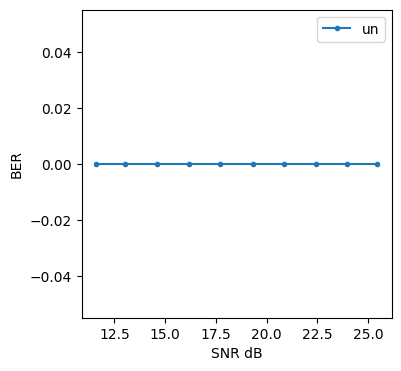

In [ ]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(4, 4))
idxs = np.argsort(snrs).tolist()
snrs_ = [snrs[idx] for idx in idxs]
bers_ = [bers[idx] for idx in idxs]
print(snrs_, bers_)
plt.plot(snrs_, bers_, '.-', label="un")

plt.xlabel("SNR dB")
plt.ylabel("BER")
# plt.yscale("log")
# plt.grid()
# plt.tick_params(axis='both', which='major', labelsize=28)
# plt.tick_params(axis='both', which='minor', labelsize=28)
plt.legend()
plt.show()

In [ ]:
#!/bin/python3

import numpy as np
from tqdm import tqdm

H = np.loadtxt('H.txt', usecols=range(512), dtype=int)
q = 16
p = 4
n = H.shape[1]
R = (n - H.shape[0]) / n
l = np.count_nonzero(H[:, 0])

print("H shape is", H.shape)
print(f"q = {q}, R = {R}, n = {n}, l = {l}")

ldpc = LDPC(q, H)

errs = []

for i in tqdm(range(n)):
    for j in range(1, q):
        v = np.zeros(n)
        v[i] = j
        c, F = ldpc.single_threshold_majority(v, 0)
        if np.count_nonzero(c) != 0 or F == False:
            # print(errs)
            errs.append((i, j, np.count_nonzero(c) == 0, F))

print(errs)

H shape is (128, 512)
q = 16, R = 0.75, n = 512, l = 5


  6%|▌         | 31/512 [00:30<09:04,  1.13s/it]